# Challenge técnico Xepelin

In [1]:
# Consigna: estamos desarrollando un nuevo producto y tu objetivo es analizar los datos transaccionales disponible y generar un
# modelo que permita predecir cuánto dinero se pagará a través de este producto y cuanto se financiará . Crea el modelo que consideres apropiado para estimar el dinero que se moverá en Xepelin
# durante junio 2022. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data_test.csv')

In [4]:
data.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,2022-04-23 00:00:00,1490.46,0.00,PAID
1,93,11,18660730,2021-11-20 00:00:00,6418.28,624.48,PAID
2,122,12,18660731,2021-10-19 00:00:00,27979.20,10520.15,PAID
3,85,13,18660732,2021-11-13 00:00:00,183070.77,79421.63,PAID
4,87,14,18660733,2022-03-23 00:00:00,20532.00,20532.00,PAID


## Limpieza de datos

In [5]:
data['paidAt'] = pd.to_datetime(data['paidAt']) #separamos la columna datetime en date y time
data['date'] = data['paidAt'].dt.strftime('%m-%Y')
data['time'] = data['paidAt'].dt.strftime('%H:%M')

In [6]:
data.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time
0,53,10,18660729,2022-04-23,1490.46,0.00,PAID,04-2022,00:00
1,93,11,18660730,2021-11-20,6418.28,624.48,PAID,11-2021,00:00
2,122,12,18660731,2021-10-19,27979.20,10520.15,PAID,10-2021,00:00
3,85,13,18660732,2021-11-13,183070.77,79421.63,PAID,11-2021,00:00
4,87,14,18660733,2022-03-23,20532.00,20532.00,PAID,03-2022,00:00


In [7]:
data['date'].isna().value_counts()

False    892
True     308
Name: date, dtype: int64

In [8]:
data['time'].value_counts() #vemos que el 70 porciento de nuestro horario es 00:00:00 por ende no vamos a utilizar esta columna en nuestro modelo

00:00    840
16:13      3
15:57      3
13:56      2
20:08      2
02:16      2
22:47      1
22:50      1
15:15      1
15:19      1
16:06      1
18:31      1
23:03      1
21:34      1
21:51      1
23:04      1
22:37      1
16:05      1
15:21      1
20:14      1
22:57      1
20:49      1
21:02      1
14:19      1
16:54      1
15:56      1
15:31      1
16:28      1
14:13      1
00:15      1
20:19      1
20:34      1
22:03      1
14:47      1
18:27      1
23:27      1
18:03      1
17:07      1
17:08      1
18:05      1
14:23      1
15:53      1
18:42      1
18:09      1
18:41      1
18:29      1
Name: time, dtype: int64

In [9]:
data['time'].isna().value_counts() #vemos que la columna de time tiene en muchos datos en nan pero como no la utilizaremos no los vamos a reemplazar

False    892
True     308
Name: time, dtype: int64

## EDA

In [10]:
data['porcentaje'] = (data['amountfinancedByXepelin']) *100 / data['amount'].round(0)
#creamos la columna de porcentaje para conocer cuanto porcentaje del amount es financiado por xepelin y graficar variables

In [11]:
data.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time,porcentaje
0,53,10,18660729,2022-04-23,1490.46,0.00,PAID,04-2022,00:00,0.000000
1,93,11,18660730,2021-11-20,6418.28,624.48,PAID,11-2021,00:00,9.730134
2,122,12,18660731,2021-10-19,27979.20,10520.15,PAID,10-2021,00:00,37.600164
3,85,13,18660732,2021-11-13,183070.77,79421.63,PAID,11-2021,00:00,43.382966
4,87,14,18660733,2022-03-23,20532.00,20532.00,PAID,03-2022,00:00,100.000000


In [12]:
data['porcentaje'].dtype

dtype('float64')

In [13]:
## Graficos 

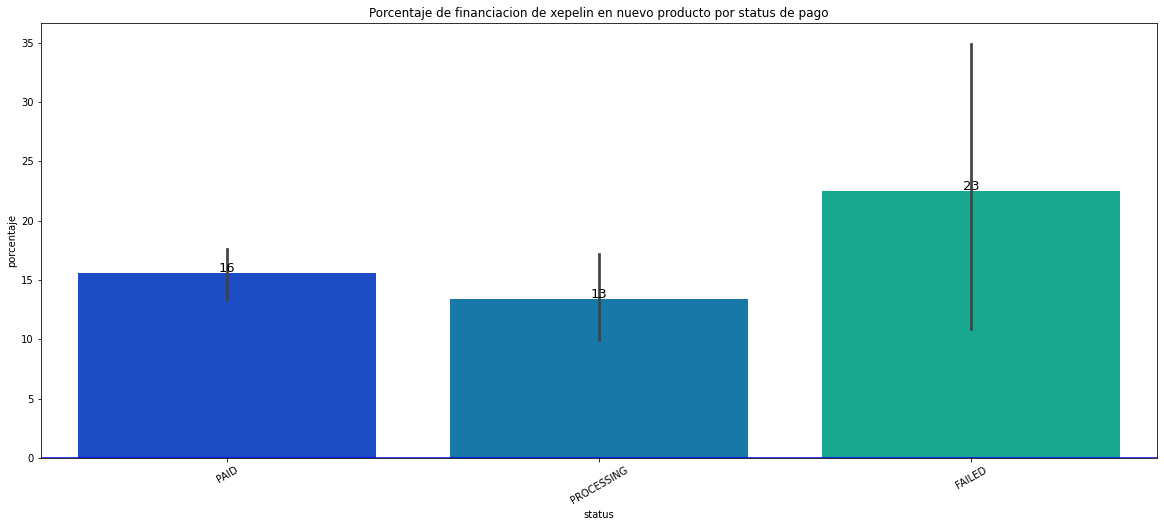

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="status",
            y="porcentaje",
            data= data,palette="winter", ax=ax)
chart.set_title('Porcentaje de financiacion de xepelin en nuevo producto por status de pago')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.axhline(data['porcentaje'].median(),color='b')
plt.show()

In [15]:
paid = data.loc[data['status'] == 'PAID'] 

In [16]:
paid['porcentaje'].median()

0.0

In [17]:
paid['porcentaje'].std()

33.48255021085648

In [18]:
processing = data.loc[data['status'] == 'PROCESSING'] 

In [19]:
processing['porcentaje'].median()

0.0

In [20]:
processing['porcentaje'].std()

31.875336909824

In [21]:
paid = data.loc[data['status'] == 'PAID'] 

In [22]:
paid['porcentaje'].median()

0.0

In [23]:
paid['porcentaje'].std()

33.48255021085648

In [24]:
# Aca vemos que el porcentaje mas alto de financiacion permanece en status failed. 
#Esto nos hace preguntarnos que significa este status?que se # ingreso el pago y no se realizo la transaccion? 
#sera un tema de nuestra plataforma a revisar? temas a discutir. de todas maneras la media es 0 
# y la desviacion standar es alta, por lo tanto contamos con valores muy altos de porcentajes que alzan la media en todos los status.

In [25]:
data['porcentaje'].value_counts()

0.000000      914
100.000000     26
100.001845      6
100.000168      4
100.000608      3
             ... 
100.000292      1
99.999643       1
30.853223       1
0.563283        1
99.999939       1
Name: porcentaje, Length: 243, dtype: int64

In [26]:
full = data.loc[data['porcentaje'] == 100.000000]

In [27]:
full

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time,porcentaje
4,87,14,18660733,2022-03-23 00:00:00,20532.0,20532.0,PAID,03-2022,00:00,100.0
24,55,65,18660753,2022-01-10 00:00:00,6380.0,6380.0,PAID,01-2022,00:00,100.0
27,21,71,18660756,2022-01-10 00:00:00,6000.0,6000.0,PAID,01-2022,00:00,100.0
49,145,89,18660778,2021-11-14 00:00:00,6380.0,6380.0,PAID,11-2021,00:00,100.0
56,170,42,18660785,2022-01-19 00:00:00,3161.0,3161.0,PAID,01-2022,00:00,100.0
145,104,14,18660874,2022-03-13 00:00:00,284548.0,284548.0,PAID,03-2022,00:00,100.0
216,67,38,18660945,2022-04-23 00:00:00,158108.0,158108.0,PAID,04-2022,00:00,100.0
229,103,14,18660958,2022-04-23 00:00:00,15660.0,15660.0,PAID,04-2022,00:00,100.0
275,135,83,18661004,2022-02-05 00:00:00,8120.0,8120.0,PAID,02-2022,00:00,100.0
299,193,133,18661028,2022-02-05 00:00:00,7018.0,7018.0,PAID,02-2022,00:00,100.0


In [28]:
full['status'].value_counts()

PAID          20
PROCESSING     5
FAILED         1
Name: status, dtype: int64

In [29]:
# Observamos que son pocos los casos en los que xepelin financio el 100% del pago. Se trata de menos del 2%. 
# En principio se trata de un producto # en el cual la financiacion del 100% de xepelin no esta funcionado. 
# El 76% de estos casos de financiacion # del 100 ya fueron pagados, y solo uno fallo en el pago.

In [30]:
cero = data.loc[data['porcentaje'] == 00.000000]

In [31]:
cero

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time,porcentaje
0,53,10,18660729,2022-04-23,1490.46,0.0,PAID,04-2022,00:00,0.0
7,55,17,18660736,2022-04-23,1190.46,0.0,PAID,04-2022,00:00,0.0
8,126,18,18660737,2021-10-09,920.26,0.0,PAID,10-2021,00:00,0.0
9,151,19,18660738,2021-10-09,1490.46,0.0,PAID,10-2021,00:00,0.0
10,37,21,18660739,2022-03-23,990.46,0.0,PAID,03-2022,00:00,0.0
...,...,...,...,...,...,...,...,...,...,...
1195,9,16,18661924,NaT,1281.86,0.0,FAILED,NaN,NaN,0.0
1196,135,80,18661925,NaT,1147.86,0.0,FAILED,NaN,NaN,0.0
1197,61,16,18661926,NaT,1490.46,0.0,FAILED,NaN,NaN,0.0
1198,36,154,18661927,NaT,800.66,0.0,FAILED,NaN,NaN,0.0


In [32]:
cero['status'].value_counts()

PAID          671
PROCESSING    216
FAILED         27
Name: status, dtype: int64

In [33]:
# El 76% de los casos no fueron financiados por xepelin. Este numero es muy alto, considero que deberiamos estar financiando muchos pagos mas y
# que el producto deberia seguir creciendo y ocupando mercado. 
#Deberiamos analizar que esta fallando que nuestros clientes no estan eligiendo #este tipo de financiacion que brindamos. Este nuevo producto debe crecer.

In [34]:
data['date'] = data['date'].fillna("-1") #a los fines de graficar vamos a reemplazar los nan de esta columna por un string. no vamos a reemplazar con la fecha mas usada, ya que traeria mucha correlacion con una fecha, y debemos usar esta columna cuando entrenemos el modelo

In [35]:
last_year = data[data['date'].str.contains("2021")]

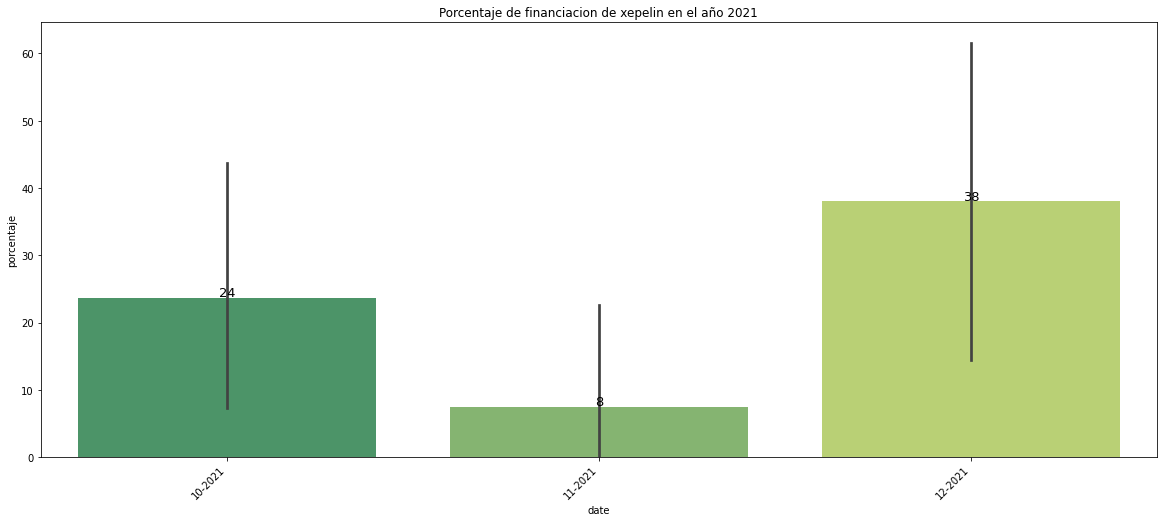

In [36]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="porcentaje",
            data= last_year, palette="summer", ax=ax)
chart.set_title('Porcentaje de financiacion de xepelin en el año 2021')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
x_dates = last_year['date'].sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()

In [37]:
this_year = data[data['date'].str.contains("2022")]

In [38]:
this_year

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,date,time,porcentaje
0,53,10,18660729,2022-04-23 00:00:00,1490.46,0.00,PAID,04-2022,00:00,0.000000
4,87,14,18660733,2022-03-23 00:00:00,20532.00,20532.00,PAID,03-2022,00:00,100.000000
6,99,16,18660735,2022-04-23 00:00:00,6323.16,2522.42,PAID,04-2022,00:00,39.892772
7,55,17,18660736,2022-04-23 00:00:00,1190.46,0.00,PAID,04-2022,00:00,0.000000
10,37,21,18660739,2022-03-23 00:00:00,990.46,0.00,PAID,03-2022,00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...
1117,163,143,18661846,2022-02-01 15:15:00,1490.26,0.00,PAID,02-2022,15:15,0.000000
1152,121,43,18661881,2022-01-22 18:29:00,1490.26,0.00,PAID,01-2022,18:29,0.000000
1163,191,118,18661892,2022-02-23 00:00:00,1147.86,0.00,PAID,02-2022,00:00,0.000000
1164,171,125,18661893,2022-02-23 00:00:00,1792.46,0.00,PAID,02-2022,00:00,0.000000


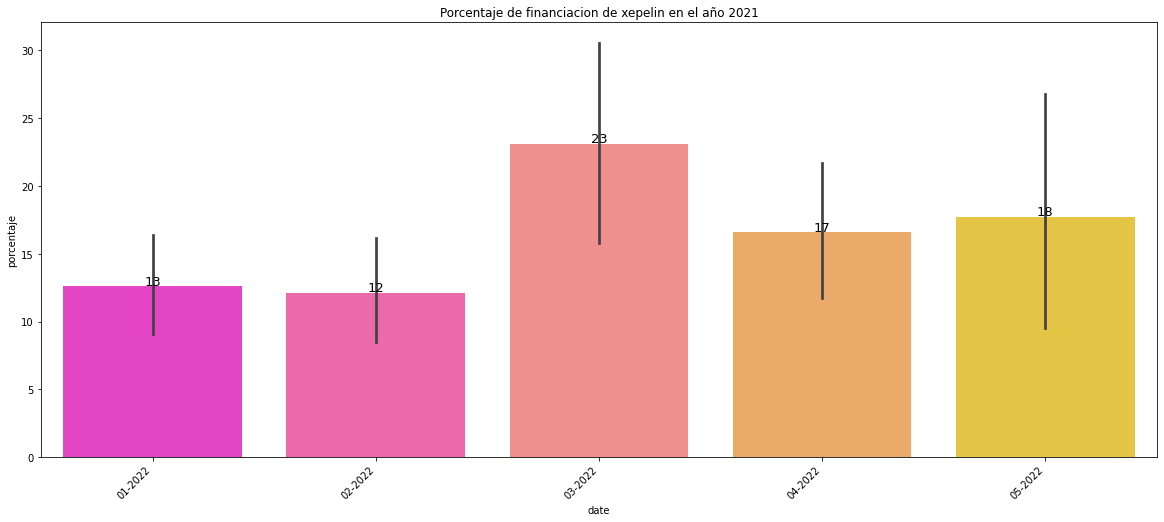

In [39]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="porcentaje",
            data= this_year, palette="spring", ax=ax)
chart.set_title('Porcentaje de financiacion de xepelin en el año 2021')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
x_dates = this_year['date'].sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()

In [40]:
# Luego de ver estos graficos entendemos que las facturas que tienen fecha son las que han sido abonadas, 
# mientras que las que permanecen con nan son las que aun no. 
# El año pasado la media en el mes de diciembre de financiacion fue de 38%, siendo el mejor mes del año para el nuevo producto. 
# Viendo este año, encontramos que el mejor mes fue el de marzo donde tuvimos la media mas alta de financiacion, y el mes de mayo vino en alza.  

In [41]:
df = data.groupby('date').agg(
        amount=('amount',np.mean),
        amount_xepp=('amountfinancedByXepelin',np.mean),
        count_dates=('date',len)
    ).reset_index()\
    .sort_values(by='count_dates', ascending=False)

In [42]:
df

,date,amount,amount_xepp,count_dates
0,-1,19453.201688,14437.404968,308
4,04-2022,18744.980260,11367.547881,269
3,03-2022,25626.312222,10419.466578,225
2,02-2022,38801.423552,24512.089727,183
1,01-2022,68065.845981,48780.477850,107
5,05-2022,16175.186575,9790.900959,73
8,12-2021,44349.793529,34872.415882,17
7,11-2021,20642.245385,9180.962308,13
6,10-2021,7180.528000,2104.030000,5


In [43]:
# Estos son los meses del año de los que tenemos datos, los ultimos tres meses del 2021, y los primeros 5 meses del año 2022. 
#Si tuvieramos el mes de junio del 2021, podriamos utilizarlo para estuimar junio del 2022, ya que puede existit uy factor de estacionalidad que podria detectarse 
#utilizando el mismo mes del año pasado. 
#Como esto no es posible y ademas ocntamos con pocos datos, usaremos todos los meses que se nos brindaron para entrenar el modelo. 
#Pero un estudio de estacionalidad es recomendable.  

## Estacionalidad de amout y de financiacion de xepelin 

In [44]:
df = df[~df['date'].str.startswith('-1')]


In [45]:
last = df[df['date'].str.contains("2021")]

In [46]:
this = df[df['date'].str.contains("2022")]

In [47]:
last = last.sort_values(by = 'date', ascending = True)

In [48]:
this = this.sort_values(by = 'date', ascending = True)

## amount 

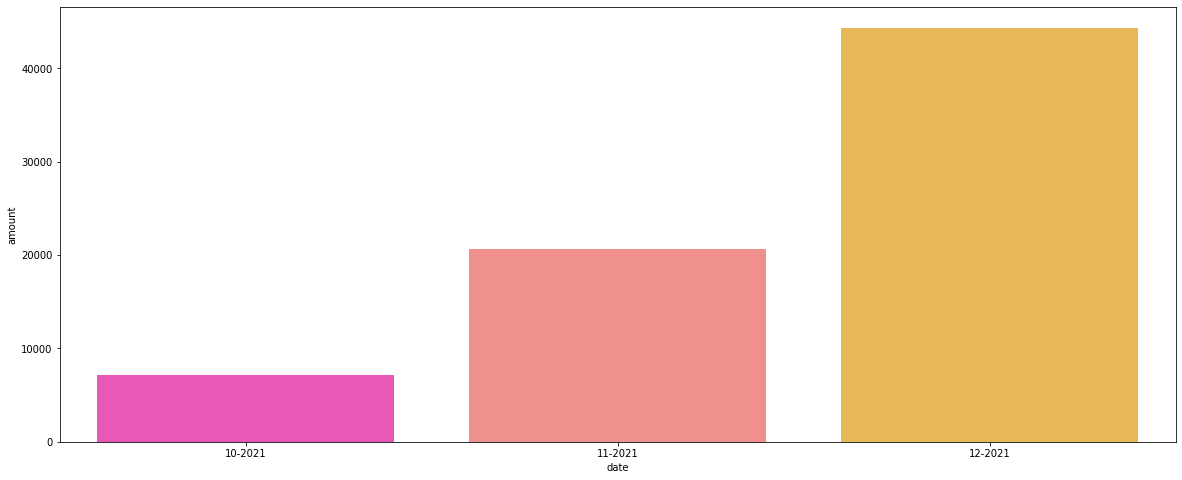

In [49]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="amount",
            data= last, palette="spring", ax=ax)
plt.show()

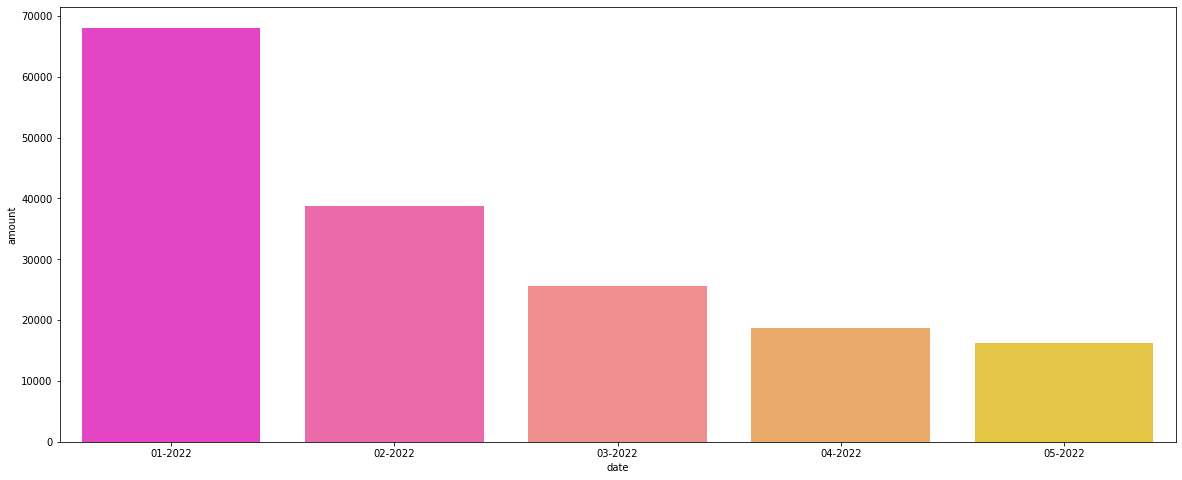

In [50]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="amount",
            data= this, palette="spring", ax=ax)
plt.show()

## financiado por xepelin

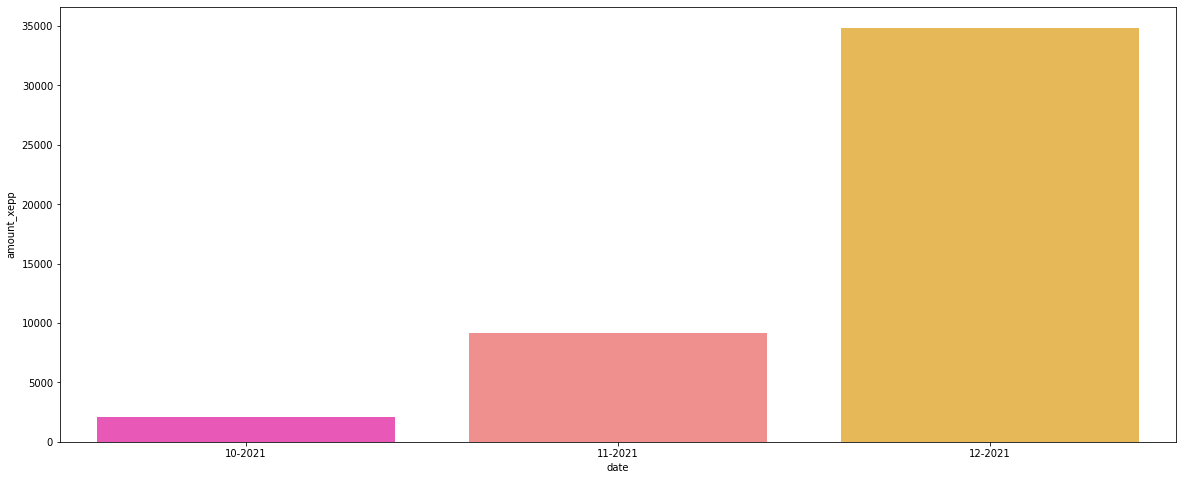

In [51]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="amount_xepp",
            data= last, palette="spring", ax=ax)
plt.show()

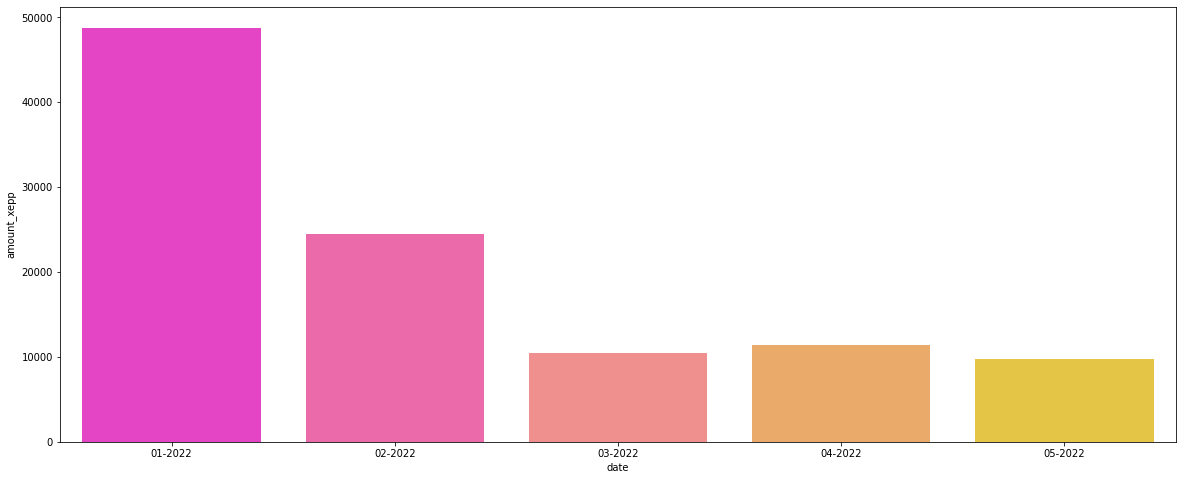

In [52]:
fig, ax = plt.subplots(figsize=(20, 8))
chart = sns.barplot(x="date",
            y="amount_xepp",
            data= this, palette="spring", ax=ax)
plt.show()

In [53]:
# Aca ya observamos la relacion tan fuerte entre el amount y lo financiado por xepelin. 
# En los meses donde los pagos son mas grandes, es donde mas dinero se financia a traves de xepelin tambien. 
#Siempre teniendo en cuenta que estamos tomando la media. 
#Por otro lado, el porcentaje nos dio informacion valiosa tambien, porque nos dijo que en marzo fue cuando mas porcentaje se financio, a pensar de no ser el mes con mas amout de este año. 

## Analisis de variables 

In [54]:
# Vamos a revisar las variables que se nos dieron para ver, cuales nos servirán para entrenar a nuestro modelo. 
# Recordemos que dejamos de lado la variable de horas por su gran cantidad de datos repetidos, y valores nan. 
# En el caso de la variable de fechas la vamos a utilizar como está, con el reemplazo de los valores nan. 
# Tenemos muy pocos casos para entrenar, entonces dejar de lado variables no es lo optimo. 
# En el caso de la variable de ID de las facturas, tambien vamos a dejarla de lado, ya que es una variable categorica que no tiene relacion alguna con las demas. 
# La variable amout sera utilizada ya que es una parece ser una variable fuerte y determinante para nuestro modelo. 
#Nuestra variable a predecir es la cantidad de dinero que financiará Xepelin.  
#Vamos a construir un modelo de regresion ya que estamos hablando de un modelo que necesitamos que prediga una variable numerica continua. 

In [55]:
payer_s = data.groupby('PayerId')['status'].value_counts().to_frame()

In [56]:
payer_s

status
PayerId status            
1       PAID             6
        PROCESSING       2
2       PAID             3
        PROCESSING       1
3       PROCESSING       1
...                    ...
198     PAID             4
        PROCESSING       1
199     PAID             5
        PROCESSING       3
200     PAID             2

[389 rows x 1 columns]

In [57]:
payer = data.groupby('PayerId').agg(
        amount=('amount',np.mean),
        amount_xepp=('amountfinancedByXepelin',np.mean)
    ).reset_index()

In [58]:
payer

,PayerId,amount,amount_xepp
0,1,2747.452500,1315.44000
1,2,3589.302500,0.00000
2,3,2766.200000,0.00000
3,4,1178.080000,0.00000
4,5,7479.515000,2075.81250
...,...,...,...
195,196,5743.965714,1962.15000
196,197,45408.488000,44477.62400
197,198,1629.878000,200.00200
198,199,3206.555000,553.59875


In [59]:
#Encontramos que la variable PayerId adopta gran variedad de valores, lo cual nos indica a primera vista que es una buena variable para ser usada en nuestro modelo. 
#No existe una repeticion de los mismos PayerID o que correlacione muy fuerte con el resto de nuestras variables, y que nos indique lo contrario. 

In [60]:
receiver_s = data.groupby('ReceiverId')['status'].value_counts().to_frame()

In [61]:
receiver_s

status
ReceiverId status            
10         PAID             8
           PROCESSING       3
           FAILED           1
11         PAID            13
           PROCESSING       5
...                       ...
153        PROCESSING       2
           FAILED           1
154        PAID             4
           FAILED           1
           PROCESSING       1

[182 rows x 1 columns]

In [62]:
receiver = data.groupby('ReceiverId').agg(
        amount=('amount',np.mean),
        amount_xepp=('amountfinancedByXepelin',np.mean)
    ).reset_index()

In [63]:
receiver

,ReceiverId,amount,amount_xepp
0,10,6676.668333,901.607500
1,11,27149.696111,25330.743333
2,12,30861.940000,7975.031667
3,13,27381.316667,14972.901667
4,14,23341.711452,8421.231720
...,...,...,...
72,145,1570.483333,0.000000
73,149,15852.090000,12014.893333
74,151,19281.863333,10794.276667
75,153,15877.633333,15191.403333


In [64]:
#Lo mismo pasa con la variable Receiver. Lo que intentamos ver es si no se trata de una variable donde se repitan las mismas empresas como recibidoras, 
#o que acumulen la mayor parte de amount o de dinero financiado por xepelin. Visto esto, a esta variable tambien la utilizaremos.

In [65]:
#Resumen :
    #variables a usar : PayerId - ReceiverId - date - amount - amountfinancedByXepelin - status
    #variables descartadas: invoiceId - time

        #Aclaracion: Lo ideal es no descatar datos, pero a los fines de este analisis es la mejor opcion.

In [66]:
df = data.drop(columns=['invoiceId', 'time', 'paidAt', 'porcentaje'])

In [67]:
df.head()

,PayerId,ReceiverId,amount,amountfinancedByXepelin,status,date
0,53,10,1490.46,0.00,PAID,04-2022
1,93,11,6418.28,624.48,PAID,11-2021
2,122,12,27979.20,10520.15,PAID,10-2021
3,85,13,183070.77,79421.63,PAID,11-2021
4,87,14,20532.00,20532.00,PAID,03-2022


In [68]:
df.isnull().values.any()

False

## Modelado

In [69]:
# Este problema que se nos planteo, pronosticar el movimiento de dinero en junio del 2022, es un problema que puede ser atacado mediante series de tiempo. 
#Pero antes de hacerlo, vamos a crear ademas un modelo de regresion, que podrá servirnos tambien, siempre y cuando las metricas del mismo sean favorables. 
#Comenzamos entonces con un modelo de regresion, y finalizaremos con nuestra serie de tiempo. 

## Construcción de modelo de regresión

### XGBoost Extreme Gradient Boosting

In [70]:
# XGBoost Extreme Gradient Boosting es un modelo supervisado que utiliza el principio de boosting. 
# La idea detrás del boosting es generar múltiples modelos de predicción “débiles” secuencialmente, y que cada uno de estos tome los resultados del modelo anterior, para generar un modelo más “fuerte”, con mejor poder predictivo y mayor estabilidad en sus resultados. 
# Para conseguir un modelo más fuerte a partir de estos modelos débiles, se emplea un algoritmo de optimización, y en este caso el descenso del gradiente. 
# De todos los modelos de regresion disponibles, elegi este porque es un modelo robusto y que se ejecuta relativamente rapido. Si bien siempre es bueno comenzar con modelos simples e ir de lo simple a lo complejo, al tratarse de un ejercicio para entrar a una empresa vamos a hacer un modelito bien moderno. 
# Otra alternativa era usar la libreria AutoML, que prueba diversos modelos y elige el mejor. Pero vamos con el XG boost. 

In [71]:
# hacer one hot encoding o get dummys 

In [72]:
data = pd.get_dummies(df, columns = ['PayerId', 'ReceiverId', 'status', 'date'])

In [73]:
data.head()

,amount,amountfinancedByXepelin,PayerId_1,PayerId_2,PayerId_3,PayerId_4,PayerId_5,PayerId_6,PayerId_7,PayerId_8,...,status_PROCESSING,date_-1,date_01-2022,date_02-2022,date_03-2022,date_04-2022,date_05-2022,date_10-2021,date_11-2021,date_12-2021
0,1490.46,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6418.28,624.48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,27979.20,10520.15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,183070.77,79421.63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20532.00,20532.00,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
data.columns

Index(['amount', 'amountfinancedByXepelin', 'PayerId_1', 'PayerId_2',
       'PayerId_3', 'PayerId_4', 'PayerId_5', 'PayerId_6', 'PayerId_7',
       'PayerId_8',
       ...
       'status_PROCESSING', 'date_-1', 'date_01-2022', 'date_02-2022',
       'date_03-2022', 'date_04-2022', 'date_05-2022', 'date_10-2021',
       'date_11-2021', 'date_12-2021'],
      dtype='object', length=291)

In [75]:
#!pip install xgboost

In [76]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

### Seleccion de variables dep e ind 

In [77]:
X = data.drop('amountfinancedByXepelin', axis = 1)

In [78]:
y = data['amountfinancedByXepelin']

##### Train - test split

In [79]:
# se recomienda siempre usar un set de validacion antes de pasar a test, pero en este caso vamos a avanzar rapido de esta manera 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1) #75 - #25 split (test_size= 0.25)

In [81]:
X_train.shape, X_test.shape

((900, 290), (300, 290))

### Model fit

In [82]:
model = XGBRegressor()

In [83]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

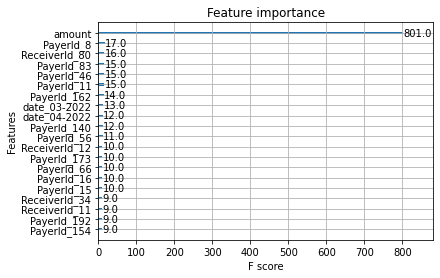

In [84]:
xgb.plot_importance(model, max_num_features=20, ax= plt.gca())

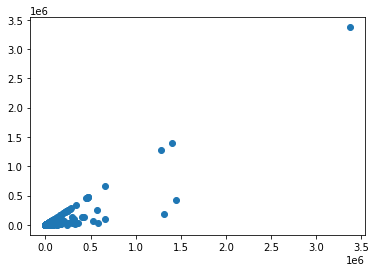

In [85]:
plt.scatter(data['amount'], data['amountfinancedByXepelin']) 
plt.show()

In [86]:
# Observamos que existe una relacion fuerte entre la variable amount y la variable que queremos predecir que sera nuestro financiamiento. 
# El resto de las variables parecen no presentar una relacion fuerte con nuestra variable Y, como lo hace la variable amount. Necesitariamos incorporar nuevas variables con mayor importancia para que nuestro modelo no prediga solo en base al amount. 
# Por ejemplo, estas nuevas variables podrian estar relacionadas con el comportamiento crediticio de cada empresa que hara el pago, a traves de los años.

### Predicting new values

In [87]:
predictions = model.predict(X_test)

In [88]:
predictions[1:10]

array([-2.9351697e+00,  6.7473555e+00,  1.0000477e+03,  5.3664258e+04,
        7.0981650e+00,  6.7473555e+00,  7.8494940e+02,  6.7473555e+00,
        2.5491584e+03], dtype=float32)

In [89]:
X_test.iloc[1]

amount          1490.46
PayerId_1          0.00
PayerId_2          0.00
PayerId_3          0.00
PayerId_4          0.00
                 ...   
date_04-2022       0.00
date_05-2022       1.00
date_10-2021       0.00
date_11-2021       0.00
date_12-2021       0.00
Name: 683, Length: 290, dtype: float64

In [90]:
y_test.iloc[1]

0.0

### Model Error

In [91]:
### Training MSE

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
pred_train = model.predict(X_train)

In [94]:
print(r2_score(y_train, pred_train))

0.9998933790269489


In [95]:
print(mean_squared_error(y_train, pred_train))

2104892.2749763243


In [96]:
### Testing MSE

In [97]:
model.score(X_test, y_test)

-2.7084882138170174

In [98]:
print(r2_score(y_test, predictions))

-2.7084882138170174


In [99]:
print(mean_squared_error(y_test, predictions))

3893046641.084932


### Conclusiones

In [100]:
# Este modelo no funciona bien. De entrada vemos que tenemos una sola variable en el conjunto de train que esta prediciendo nuestra variable Y. Necesitamos mas variables utiles para predecir. Y tambien mas datos. Podemos ver que el R2, el cual nos dice cuanta varianza explica el modelo, cae en nuestro set de test. 
# Y por otro lado esta overfiteando nuestro modelo de una manera increible, cuando revisamos el mean squared error. 
# Por lo tanto este dataset y esta informacion con la que contamos no nos esta permitiendo estimar junio en 2022. 
# Ante un problema de regresion, siempre es bueno probar modelos de regresión para ir teniendo una imagen de que es lo que nos falta. 
# Vamos a avanzar con nuestra idea principal, que es la serie temporal. 
# De todas maneras dejamos anotado como se podria mejorar este modelo.


In [101]:
# Posibles mejoras:
    #aumento de variables significativas (ej comportamiento crediticio de empresas)
    #agregar dia de la semana en la variable de tiempo
    #finetunning de hiperparametros (ej maxima profundidad del XG boost, learning rate mayor a 30, etc)
    #aumentar cantidad de rows de datos
    #cambiar train-test size
    #correr una cross validation
    #gestión de manera externa de estacionalidad (creando variables de año, mes, agrupando en ventanas temporales, teniendo cuidado en respetar la temporalidad en la división de train y test, etc)

## Serie temporal

In [102]:
# La serie temporal es util cuando tenemos datos que se muestrean en función de una dimensión basada en el tiempo, como días, meses, años, etc. 
# En este caso nuestros datos no son lineales, y tenemos dos variables dependientes, la fecha y el amount.

In [103]:
datos = pd.read_csv('data_test.csv')

In [104]:
datos = datos.dropna(subset=['paidAt'])

In [105]:
datos.rename(columns = {'paidAt':'ds', 'amountfinancedByXepelin':'y'}, inplace = True)

In [106]:
df = datos.drop(columns=['PayerId', 'ReceiverId', 'invoiceId', 'status', 'amount'])

In [107]:
df = df.groupby(['ds'])['y'].sum().reset_index()

In [108]:
df['ds'] = pd.to_datetime(df['ds'])

In [109]:
df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')

In [110]:
df = df.set_index('ds')

In [111]:
period = 30

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

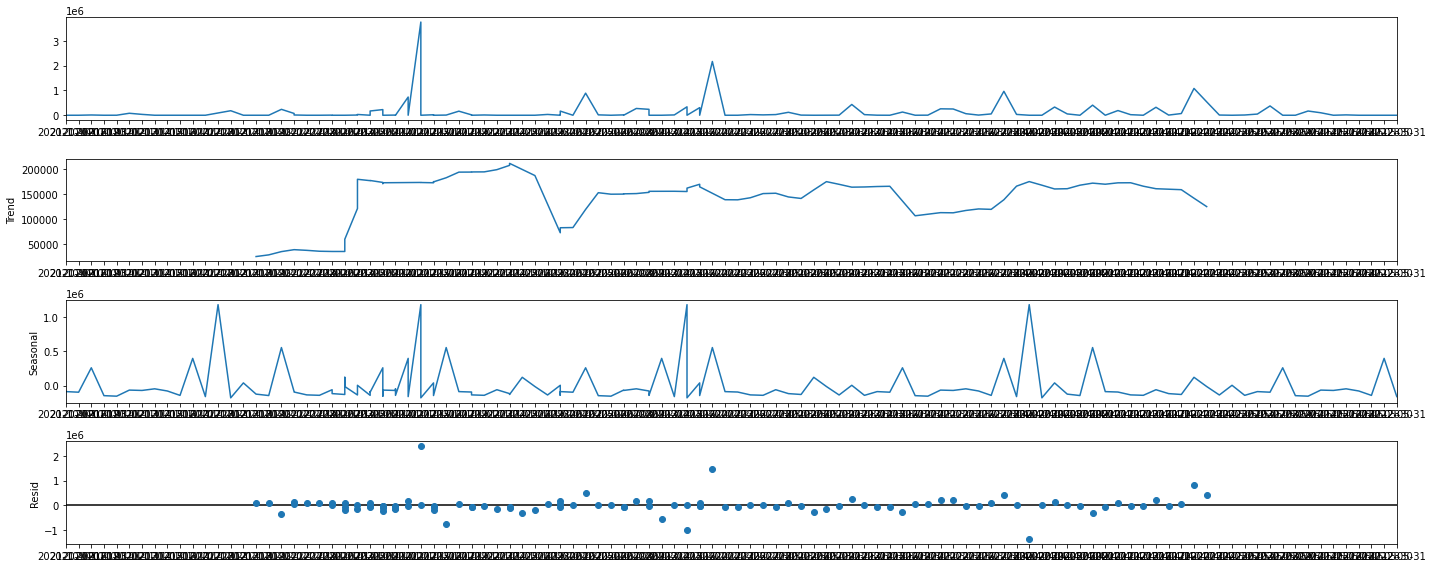

In [113]:
result = seasonal_decompose(df, model='additive', period=30)

from pylab import rcParams
rcParams['figure.figsize'] = 20,8
result.plot();

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


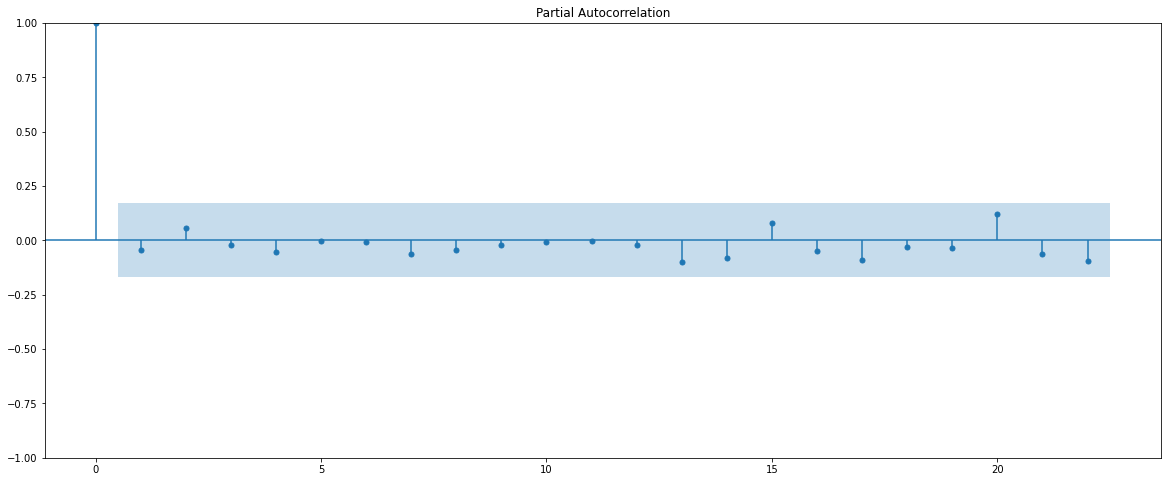

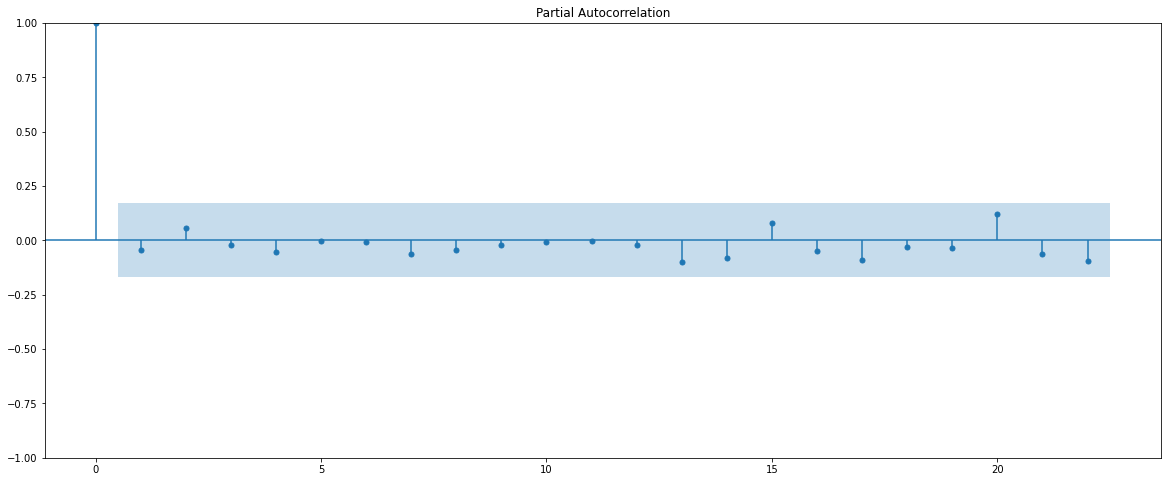

In [114]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)

In [115]:
from statsmodels.tsa.stattools import adfuller

In [116]:

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -11.89298083294517
ADF p-values: 5.809725134507589e-22
ADF number of lags used: 0
ADF number of observations: 131
ADF critical values: {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}
ADF best information criterion: 3399.6076031967154


<AxesSubplot:xlabel='ds'>

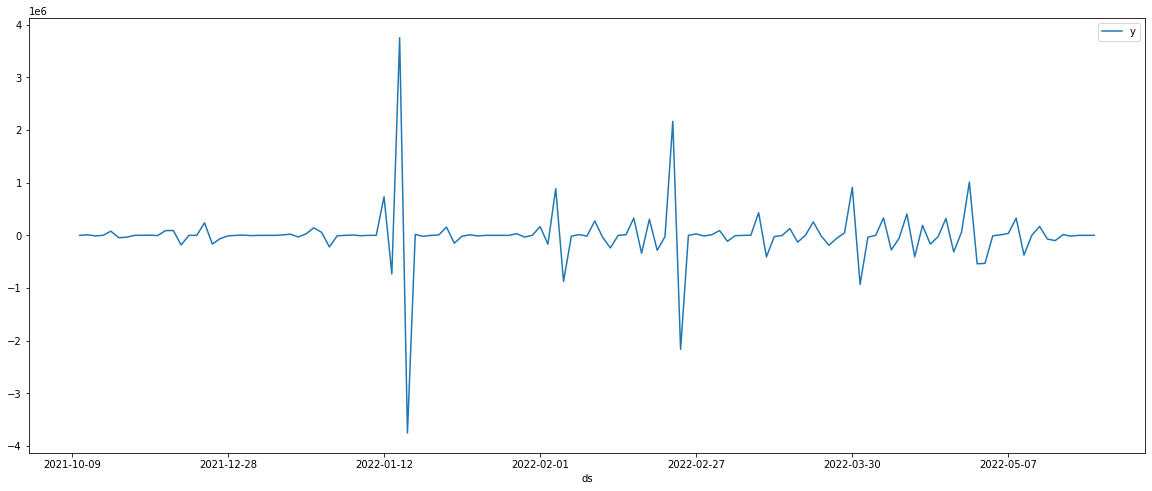

In [117]:
prev_value = df.shift()
differenced = df - prev_value
differenced.plot()

#### Prophet 

In [118]:
# funciona mejor con series con fuerte estacionalidad, pero es bueno con datos faltantes 

In [119]:
from multi_prophet import MultiProphet

In [120]:
df = pd.read_csv('data_test.csv')

In [121]:
df.shape

(1200, 7)

In [122]:
df.isnull().value_counts()

PayerId  ReceiverId  invoiceId  paidAt  amount  amountfinancedByXepelin  status
False    False       False      False   False   False                    False     892
                                True    False   False                    False     308
dtype: int64

In [123]:
df = df.dropna(subset=['paidAt'])

In [124]:
df.shape

(892, 7)

In [125]:
df.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,2022-04-23 00:00:00,1490.46,0.00,PAID
1,93,11,18660730,2021-11-20 00:00:00,6418.28,624.48,PAID
2,122,12,18660731,2021-10-19 00:00:00,27979.20,10520.15,PAID
3,85,13,18660732,2021-11-13 00:00:00,183070.77,79421.63,PAID
4,87,14,18660733,2022-03-23 00:00:00,20532.00,20532.00,PAID


In [126]:
df = df.drop(columns=['PayerId', 'ReceiverId', 'invoiceId', 'status'])

In [127]:
df.rename(columns = {'paidAt':'ds', 'amount':'y1', 'amountfinancedByXepelin':'y'}, inplace = True)

In [128]:
df.head()

,ds,y1,y
0,2022-04-23 00:00:00,1490.46,0.00
1,2021-11-20 00:00:00,6418.28,624.48
2,2021-10-19 00:00:00,27979.20,10520.15
3,2021-11-13 00:00:00,183070.77,79421.63
4,2022-03-23 00:00:00,20532.00,20532.00


### Junio del 2022

In [129]:
m = MultiProphet(columns=["y", "y1"])
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [130]:
future_df = m.make_future_dataframe(periods=30, freq='d')
forecast = m.predict(future_df)

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

In [131]:
forecast["y"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
917,2022-06-26,-2241.741892,-172197.758357,173926.685511
918,2022-06-27,-16869.054686,-184372.619071,152529.338023
919,2022-06-28,13755.554449,-153427.031963,182119.579032
920,2022-06-29,-894.592300,-172946.276212,168352.352915
921,2022-06-30,50467.444875,-116705.088924,228768.952285


In [132]:
forecast["y1"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
917,2022-06-26,-7630.946581,-207324.881441,179630.131178
918,2022-06-27,-23419.626747,-218336.869585,181035.963413
919,2022-06-28,12161.205772,-174976.837030,209555.698048
920,2022-06-29,103.823259,-193907.339771,182906.251173
921,2022-06-30,90759.440568,-109698.203103,287985.170317


In [133]:
financed = forecast["y"]

In [134]:
financed.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-09,4940.065415,-136750.539182,184781.047780,4940.065415,4940.065415,18956.533674,18956.533674,18956.533674,25018.504037,25018.504037,25018.504037,-6061.970363,-6061.970363,-6061.970363,0.0,0.0,0.0,23896.599089
1,2021-10-09,4940.065415,-148911.011589,201823.686971,4940.065415,4940.065415,18956.533674,18956.533674,18956.533674,25018.504037,25018.504037,25018.504037,-6061.970363,-6061.970363,-6061.970363,0.0,0.0,0.0,23896.599089
2,2021-10-16,6333.373578,-133942.669316,203519.681090,6333.373578,6333.373578,18956.533674,18956.533674,18956.533674,25018.504037,25018.504037,25018.504037,-6061.970363,-6061.970363,-6061.970363,0.0,0.0,0.0,25289.907252
3,2021-10-19,6930.505648,-135486.346093,196711.312330,6930.505648,6930.505648,30078.530606,30078.530606,30078.530606,25018.504037,25018.504037,25018.504037,5060.026569,5060.026569,5060.026569,0.0,0.0,0.0,37009.036255
4,2021-10-31,9319.033928,-146260.223070,203453.566841,9319.033928,9319.033928,13788.902390,13788.902390,13788.902390,25018.504038,25018.504038,25018.504038,-11229.601647,-11229.601647,-11229.601647,0.0,0.0,0.0,23107.936318


In [135]:
amount = forecast["y1"]

In [136]:
amount

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-09,46970.901326,-141006.071344,235638.390701,46970.901326,46970.901326,2877.439535,2877.439535,2877.439535,7332.913160,7332.913160,7332.913160,-4455.473625,-4455.473625,-4455.473625,0.0,0.0,0.0,49848.340861
1,2021-10-09,46970.901326,-164928.253040,247443.683527,46970.901326,46970.901326,2877.439535,2877.439535,2877.439535,7332.913160,7332.913160,7332.913160,-4455.473625,-4455.473625,-4455.473625,0.0,0.0,0.0,49848.340861
2,2021-10-16,47140.065292,-151840.235764,232637.525478,47140.065292,47140.065292,2877.439536,2877.439536,2877.439536,7332.913161,7332.913161,7332.913161,-4455.473624,-4455.473624,-4455.473624,0.0,0.0,0.0,50017.504829
3,2021-10-19,47212.564135,-129005.298892,255119.940690,47212.564135,47212.564135,18419.216713,18419.216713,18419.216713,7332.913161,7332.913161,7332.913161,11086.303552,11086.303552,11086.303552,0.0,0.0,0.0,65631.780849
4,2021-10-31,47502.559507,-165399.787497,243165.526434,47502.559507,47502.559507,-2040.665633,-2040.665633,-2040.665633,7332.913161,7332.913161,7332.913161,-9373.578794,-9373.578794,-9373.578794,0.0,0.0,0.0,45461.893874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,2022-06-26,-5590.280948,-207324.881441,179630.131178,-6187.298069,-5057.249914,-2040.665633,-2040.665633,-2040.665633,7332.913161,7332.913161,7332.913161,-9373.578794,-9373.578794,-9373.578794,0.0,0.0,0.0,-7630.946581
918,2022-06-27,-5924.145945,-218336.869585,181035.963413,-6561.233196,-5358.122396,-17495.480801,-17495.480801,-17495.480801,7332.913160,7332.913160,7332.913160,-24828.393962,-24828.393962,-24828.393962,0.0,0.0,0.0,-23419.626747
919,2022-06-28,-6258.010942,-174976.837030,209555.698048,-6935.082122,-5666.236385,18419.216714,18419.216714,18419.216714,7332.913162,7332.913162,7332.913162,11086.303552,11086.303552,11086.303552,0.0,0.0,0.0,12161.205772
920,2022-06-29,-6591.875940,-193907.339771,182906.251173,-7315.858244,-5965.765596,6695.699199,6695.699199,6695.699199,7332.913159,7332.913159,7332.913159,-637.213961,-637.213961,-637.213961,0.0,0.0,0.0,103.823259


#### Ploteando resultados

In [137]:
from fbprophet.plot import add_changepoints_to_plot

In [138]:
import plotly.graph_objs as go

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

{'y': <Figure size 648x648 with 3 Axes>,
 'y1': <Figure size 648x648 with 3 Axes>}

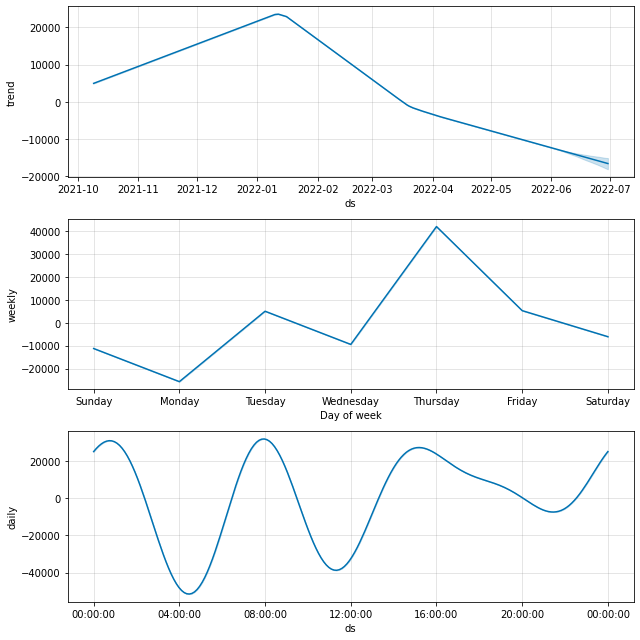

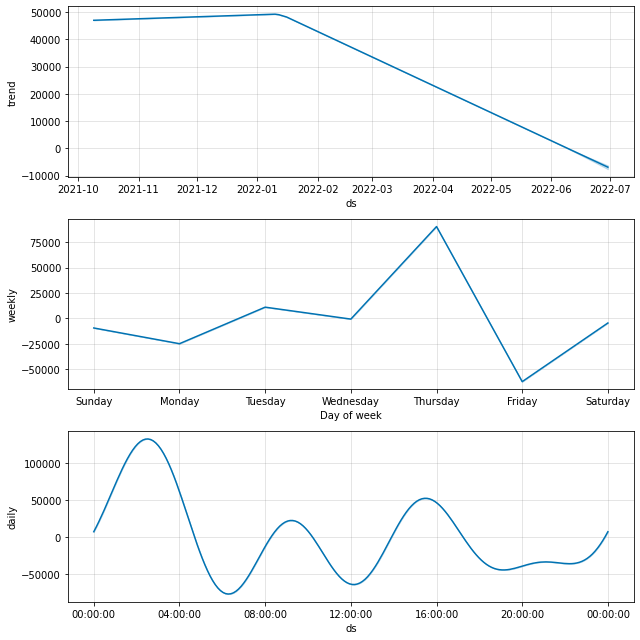

In [139]:
m.plot_components(forecast) 

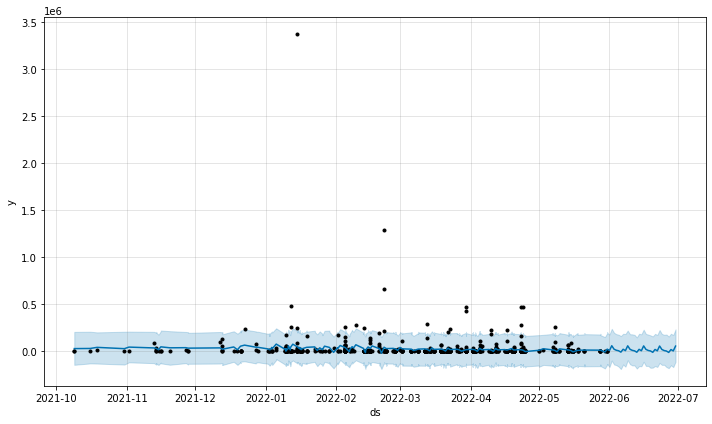

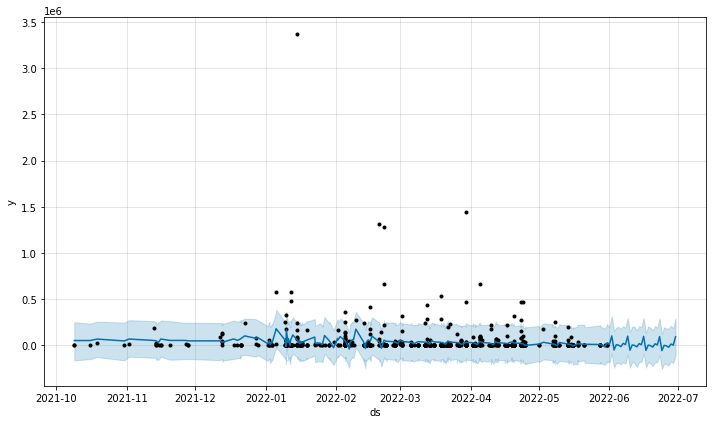

In [140]:
plot = m.plot(forecast)

## Resto del año 2022

In [141]:
future_df_2022 = m.make_future_dataframe(periods=210, freq='d')
forecast_2022 = m.predict(future_df_2022)

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/bcasalotti/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

{'y': <Figure size 648x648 with 3 Axes>,
 'y1': <Figure size 648x648 with 3 Axes>}

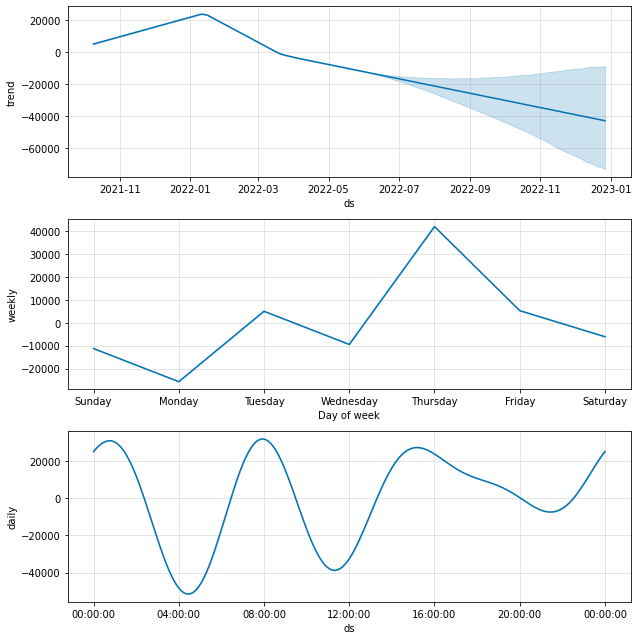

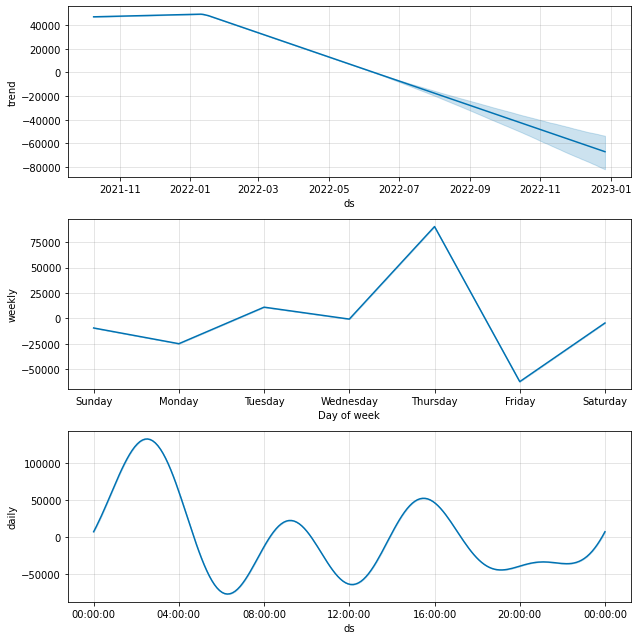

In [142]:
m.plot_components(forecast_2022) 

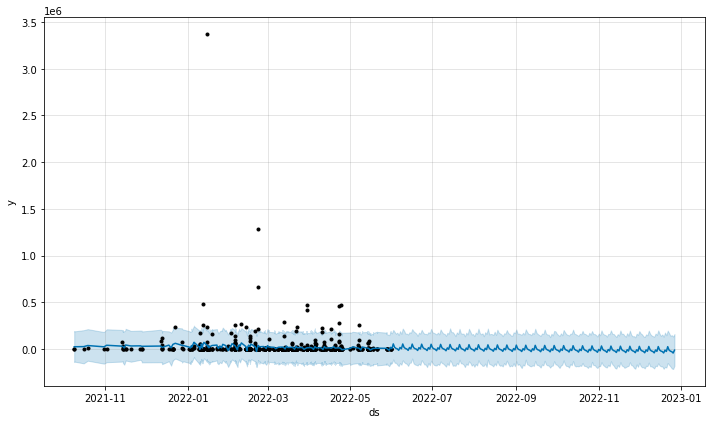

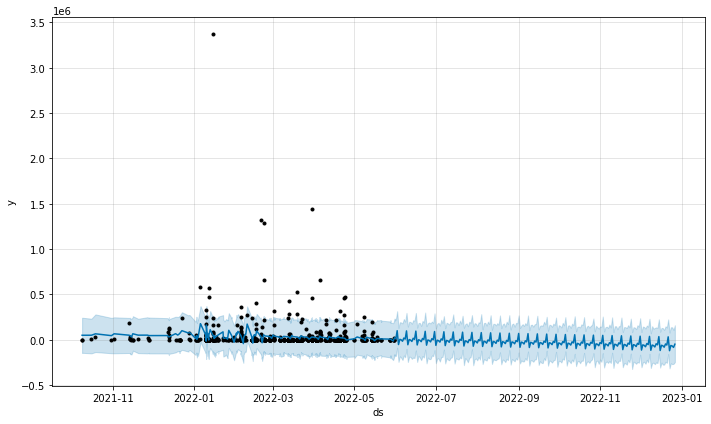

In [143]:
plot = m.plot(forecast_2022)